<a href="https://colab.research.google.com/github/SoniaVG/Analysis-of-data/blob/main/Titanic_descriptive_statistics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Descriptive statistics 

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soniavenancioguzmn","key":"8f7c58a031531fdfbf6e2d5d2e98bbe6"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download -d cities/titanic123

  0% 0.00/22.1k [00:00<?, ?B/s]
100% 22.1k/22.1k [00:00<00:00, 40.1MB/s]


In [ ]:
!unzip "/content/titanic123.zip"

Archive:  /content/titanic123.zip
  inflating: ChanDarren_RaiTaran_Lab2a.csv  


# Descriptive statistics 

**Data Dictionary**
$$\tiny{ \begin{matrix}
\text{Variable} &	\text{Definition}	& \text{Key} \\ \hline
survival & 	Survival 	&  0 = No, 1 = Yes \\ \hline
pclass 	& \text{Ticket class} &	1 = 1st, 2 = 2nd, 3 = 3rd \\ \hline
sex 	& Sex 	& \\ \hline
Age 	& \text{Age in years} 	& \\ \hline
sibsp  & \text{of siblings / spouses aboard the Titanic} 	& \\ \hline
parch 	& \text{of parents / children aboard the Titanic} & \\ \hline
ticket 	& \text{Ticket number }&	\\ \hline
fare 	& \text{Passenger fare} & 	\\ \hline
cabin &	\text{Cabin number} &	\\ \hline
embarked &	\text{Port of Embarkation} &	\text{C = Cherbourg, Q = Queenstown, S = Southampton}
\end{matrix}
}
$$

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("ChanDarren_RaiTaran_Lab2a.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
colnames=['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch']
df_final=df[colnames]
df_final.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0


In [ ]:
#see if there are missing values
df_final.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [ ]:
#replace missing values with the mean 
df_final= df_final.fillna(df_final["Age"].mean())
df_final.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#age distribution 
df_final["Age"].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#Proportion of survivors and dead 
proporcion=df_final["Survived"].value_counts()/891
total=df_final["Survived"].value_counts()

for k,i, j in zip(proporcion.index, proporcion,total):
  print("Class: {} : {:.2f} num {}".format(k,i,j))


Class: 0 : 0.62 num 549
Class: 1 : 0.38 num 342


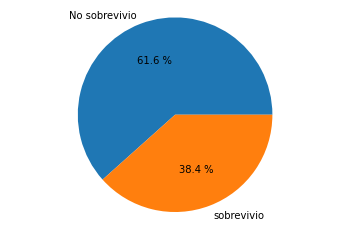

In [ ]:
from numpy.core import numeric
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors

num = [549,342]
sobrevivir = ["No sobrevivio","sobrevivio"]

plt.pie(num, labels=sobrevivir, autopct="%0.1f %%")
plt.axis("equal")
plt.show()

In [ ]:
from pandas.core.frame import DataFrame
#GENDER / SURVIVOR contingency table 
pd.crosstab(index= df_final['Survived'],columns=df_final['Sex'], margins=True)


Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [ ]:
cate=pd.DataFrame(df_final[["Sex","Survived"]].value_counts())
columnas=pd.DataFrame(cate.index.tolist())       
cate.index=np.arange(4)
cate[["genero","sobreviviente"]]=columnas
cate.columns=["conteo","genero","sobreviviente"]

male      577
female    314
Name: Sex, dtype: int64
male      0.647587
female    0.352413
Name: Sex, dtype: float64


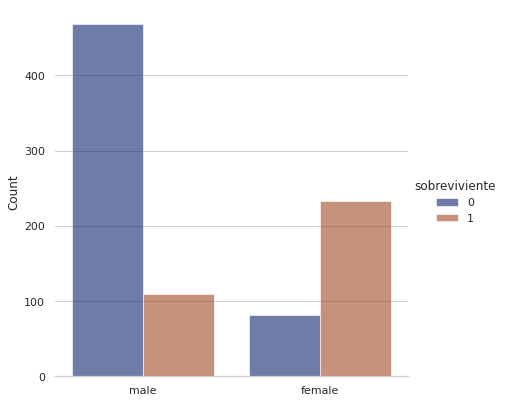

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=cate, kind="bar",
    x="genero", y="conteo", hue="sobreviviente",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Count")


print(df_final.Sex.value_counts())
print(df_final.Sex.value_counts()/891)

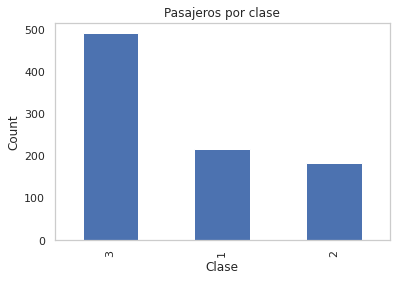

In [ ]:
#count by class 
plot = df_final['Pclass'].value_counts().plot(kind='bar',title='Pasajeros por clase')
plt.xlabel("Clase")
plt.ylabel("Count")
plt.grid()

In [ ]:
#CLASS / SURVIVOR contingency table 
pd.crosstab(index= df_final['Survived'],columns=df_final['Pclass'], margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [ ]:
tab=df_final[["Survived","Pclass"]].value_counts()
cate=pd.DataFrame(tab,columns=["conteo"])
columnas=pd.DataFrame(cate.index.tolist(),columns=["Survived","Pclass"])
cate.index=np.arange(6)
columnas["conteo"]=cate["conteo"]


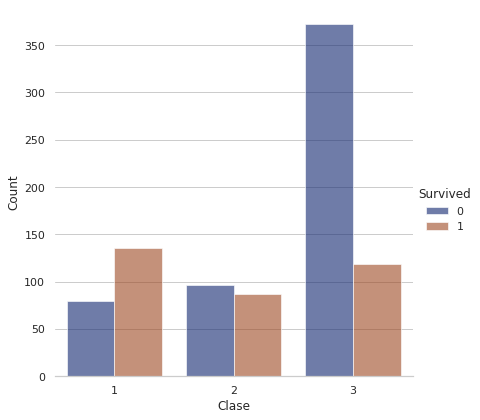

In [ ]:
g = sns.catplot(
    data=columnas, kind="bar",
    x="Pclass", y="conteo", hue="Survived",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("Clase", "Count")

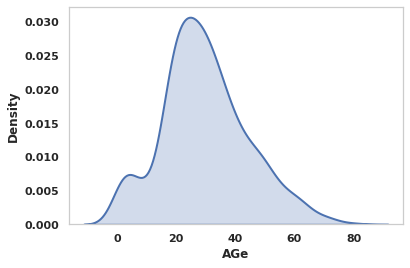

In [ ]:
#density function by age 
def graficar(datos):
  sns.kdeplot(datos, 
             linewidth=2,
             shade = True,  
             #color = 'r',  
             vertical = False
             )
  
graficar(df_final["Age"])
plt.xlabel('AGe',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.ylabel("Density",fontweight='bold')
#plt.legend()
plt.grid(False)


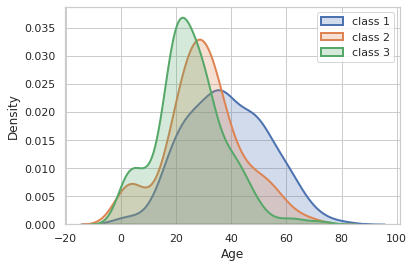

In [ ]:
#density function by class 
k1=df[df["Pclass"]==1].Age
k2=df[df["Pclass"]==2].Age
k3=df[df["Pclass"]==3].Age


graficar(k1)
graficar(k2)
graficar(k3)
plt.legend(["class 1","class 2","class 3"])

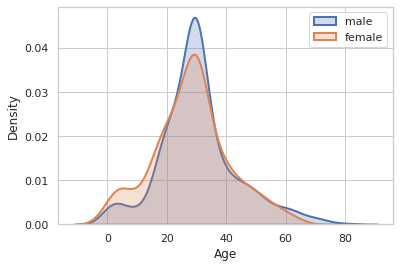

In [ ]:
#density function by gender 
k1=df_final[(df_final.Sex=="male") ].Age
k2=df_final[(df_final.Sex=="female") ].Age 

graficar(k1)
graficar(k2)
plt.legend(["male","female"])

# Conclusion of the descriptive statistics of the data 


1.   Of the total data, approximately  $68\%$  did not survive 
2.   $64\%$ y $35\%$  are men and women respectively 
3.   More men than women died 
4.   There are more people in class 3, 1 and 2 respectively
5.   More people from class 1 survived 
6.   More people in class 3 died 
7.   Of the total data, there are more people between 20 and 40 years of age 
8.   The mean age in men and women is approximately the same 
9.   The youngest people are mostly in class 3 
10.  Older people are mostly in class 1 